In [1]:
# Data Source from kaggle 

#Part 1: SVM Classification   

In [2]:
# For Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For data handling
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC

# For model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,classification_report, precision_score,recall_score,roc_auc_score

In [3]:
#Part 1: SVM (Kaggle Dataset)

In [4]:
#1 and #2 Get the dataset and load the dataset

In [5]:
headers=["iris_sepal_length_data", "iris_sepal_width_data","iris_petal_length_data","iris_petal_width_data","iris_class_data"]
irisData = pd.read_csv('iris/iris.data', names=headers)
irisData.tail()

,iris_sepal_length_data,iris_sepal_width_data,iris_petal_length_data,iris_petal_width_data,iris_class_data
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#3 Describe the data
print("KAGGLE IRIS DATASET INFO")
print(irisData.info())

KAGGLE IRIS DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iris_sepal_length_data  150 non-null    float64
 1   iris_sepal_width_data   150 non-null    float64
 2   iris_petal_length_data  150 non-null    float64
 3   iris_petal_width_data   150 non-null    float64
 4   iris_class_data         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
print("KAGGLE IRIS DATASET DESCRIPTION")
print(irisData.describe().transpose()) 

KAGGLE IRIS DATASET DESCRIPTION
                        count      mean       std  min  25%   50%  75%  max
iris_sepal_length_data  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
iris_sepal_width_data   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
iris_petal_length_data  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
iris_petal_width_data   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [8]:
#4 Preprocess data if needed. Encodding
l_e =LabelEncoder()
irisData["iris_class_data"] = l_e.fit_transform(irisData["iris_class_data"])
print(irisData["iris_class_data"])
irisData.tail()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris_class_data, Length: 150, dtype: int64


,iris_sepal_length_data,iris_sepal_width_data,iris_petal_length_data,iris_petal_width_data,iris_class_data
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
# Normalize Dataset
features=irisData.drop(columns=["iris_class_data"])
target=irisData["iris_class_data"]
print(target)
m_m_s=MinMaxScaler()
features_normalize=pd.DataFrame(m_m_s.fit_transform(features), columns=features.columns)
features_normalize.tail()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: iris_class_data, Length: 150, dtype: int64


,iris_sepal_length_data,iris_sepal_width_data,iris_petal_length_data,iris_petal_width_data
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667
149,0.444444,0.416667,0.694915,0.708333


In [10]:
#Split the dataset
iris_features_data_train, iris_features_data_test, iris_target_data_train, iris_target_data_test=train_test_split(features_normalize,target,test_size=0.2,random_state=42)
print(iris_features_data_train.describe().transpose())
print("-."*40)
print(iris_features_data_test.describe().transpose())

                        count      mean       std  min       25%       50%  \
iris_sepal_length_data  120.0  0.419213  0.228835  0.0  0.222222  0.402778   
iris_sepal_width_data   120.0  0.440625  0.185999  0.0  0.333333  0.416667   
iris_petal_length_data  120.0  0.462288  0.296822  0.0  0.084746  0.550847   
iris_petal_width_data   120.0  0.451042  0.313934  0.0  0.083333  0.500000   

                             75%       max  
iris_sepal_length_data  0.583333  0.944444  
iris_sepal_width_data   0.552083  1.000000  
iris_petal_length_data  0.694915  0.966102  
iris_petal_width_data   0.708333  1.000000  
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
                        count      mean       std       min       25%  \
iris_sepal_length_data   30.0  0.466667  0.234729  0.111111  0.312500   
iris_sepal_width_data    30.0  0.433333  0.160295  0.083333  0.333333   
iris_petal_length_data   30.0  0.488701  0.312086  0.050847  0.101695   
iris_petal_

In [11]:
# print(iris_target_data_train.describe())
# print(iris_target_data_test.describe())
# Target Description

In [12]:
def roc_curve_graph (model, k):
    iris_target_data_prob=model.predict_proba(iris_features_data_test)

    # ROC Curve Graphs
    svm_iris_fpr,svm_iris_tpr,svm_thresholds=roc_curve(iris_target_data_test,iris_target_data_prob[:,1],pos_label=1)
    svm_iris_roc_auc=auc(svm_iris_fpr,svm_iris_tpr)
    
    #Plotting
    plt.plot(svm_iris_fpr,svm_iris_tpr,label=k+" (AUC = "+str(svm_iris_roc_auc)+")")

In [13]:
def classification_report_data(model, k):
    print("-."*30)
    print("Classification (SVM/SVC) Report for IRIS dataset: "+k)
    iris_target_data_pred=model.predict(iris_features_data_test)
    c_report = classification_report(iris_target_data_test,iris_target_data_pred, output_dict=True)
    
    iris_target_data_prob=model.predict_proba(iris_features_data_test)
    svm_roc_auc=roc_auc_score(iris_target_data_test,iris_target_data_prob,multi_class="ovo")
    
    print(f"Accuracy: {c_report['accuracy']:.2f}")
    print(f"Precision: {c_report['weighted avg']['precision']:.2f}")
    print(f"Recall: {c_report['weighted avg']['recall']:.2f}")   
    print(f"F1 Score: {c_report['weighted avg']['f1-score']:.2f}")
    print(f"ROC AUC: {svm_roc_auc:.2f}")

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Classification (SVM/SVC) Report for IRIS dataset: linear
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Classification (SVM/SVC) Report for IRIS dataset: poly
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
ROC AUC: 0.99
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Classification (SVM/SVC) Report for IRIS dataset: sigmoid
Accuracy: 0.37
Precision: 0.30
Recall: 0.37
F1 Score: 0.33
ROC AUC: 0.71
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Classification (SVM/SVC) Report for IRIS dataset: rbf
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00


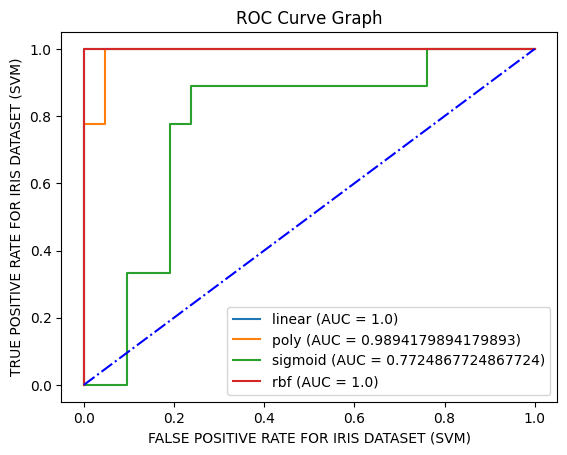

In [14]:
#5 Conduct SVM Classification. 
#6 Experiment with different kernel functions in SVC to see which one performs best for your data. 

svm_kernels=["linear","poly","sigmoid","rbf"]
for k in svm_kernels:
    iris_svc_model=SVC(kernel=k,probability=True)
    iris_svc_model.fit(iris_features_data_train,iris_target_data_train)

    iris_target_data_pred=iris_svc_model.predict(iris_features_data_test)
    
    #7 Generate classification report for iris dataset and percision
    classification_report_data(iris_svc_model,k)

    #8 ROC Curve
    roc_curve_graph(iris_svc_model,k)

plt.xlabel("FALSE POSITIVE RATE FOR IRIS DATASET (SVM)")
plt.ylabel("TRUE POSITIVE RATE FOR IRIS DATASET (SVM)")
plt.title("ROC Curve Graph")
plt.plot([0,1],[0,1], linestyle="dashdot",color="blue")
plt.legend()
plt.show()
